# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# Libraries for data manipulation
import numpy as np
import pandas as pd

# Libraries for data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


# Libraries for Statistical Analysis
import statistics as stats

### Understanding the structure of the data

In [ ]:
# Load Data
df = pd.read_csv('foodhub_order.csv')
df_unmanipulated = pd.read_csv('foodhub_order (1).csv')


# returns the first 5 rows of the data table
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


##### **Observations**:

The DataFrame has nine columns, as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
print("The sample size for this problem is:", len(df), " - {} rows, and {} columns".format(df.shape[0], df.shape[1]))


The sample size for this problem is: 1898  - 1898 rows, and 9 columns


##### **Observations**:
The data set has 1898 rows and nine columns


---





### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
# Use info() to print a concise summary of the DataFrame
df_unmanipulated.info()

# Creating a list of unique entries found in the "Ratings Column"
print("=============", end='\n \n')
print("List of unique entries found in the 'Ratings' Column", df['rating'].unique())
print("=============", end='\n \n')

# In order for rating to follow the pattern established in the column - Rating is should be an integer
df['rating'] = df['rating'].replace(['Not given'], 0)
df = df.astype({"rating": 'int64'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB
 
List of unique entries found in the 'Ratings' Column ['Not given' '5' '3' '4']
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------      

**Initial Observation**:
The various datatypes are: float64(1), int64(4), object(4).

However, the "rating" column is being read as an object when it should read as an integer. The data inconsistency is a result of the value "Not given."

In order to mainatain data type consistency, "Not given" is converted  "0" .

**Post Data Cleaning**:
The datatype count: float64(1), int64(5), object(3)



---



### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
print("Pre Data Analysis regarding missing data : data set has {} rows, and {} columns".format(df.shape[0], df.shape[1]), end='\n \n')

#To get how many missing values are in each column we will use sum() along with isnull().
# The .isnull will indicate ("True") if a null/NaN values found in a column.
print('Steps are taken To check if any null/missing value can be detected. The methods used are .isnull() and .isna()  ', end='\n')
df.isnull().sum().sort_values(ascending=False)
df.isna().sum().sort_values(ascending=False)


print("Post Data Analysis regarding missing data : data set has {} rows, and {} columns".format(df.shape[0], df.shape[1]), end='\n \n')


Pre Data Analysis regarding missing data : data set has 1898 rows, and 9 columns
 
===
 
Steps are taken To check if any null/missing value can be detected. The methods used are .isnull() and .isna()  
Post Data Analysis regarding missing data : data set has 1898 rows, and 9 columns
 


##### **Observations**:
Due to the data cleaning that transformed the Rating column ("Not Given" into 0), there is no missing data in the sample.


---



### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
food_preparation_time = df.describe()
#print(df.describe())
print(food_preparation_time)


row = [1, 3, -1]
col = [4]
food_preparation_time.iloc[row, col]

           order_id    customer_id  cost_of_the_order       rating  \
count  1.898000e+03    1898.000000        1898.000000  1898.000000   
mean   1.477496e+06  171168.478398          16.498851     2.659642   
std    5.480497e+02  113698.139743           7.483812     2.195280   
min    1.476547e+06    1311.000000           4.470000     0.000000   
25%    1.477021e+06   77787.750000          12.080000     0.000000   
50%    1.477496e+06  128600.000000          14.140000     4.000000   
75%    1.477970e+06  270525.000000          22.297500     5.000000   
max    1.478444e+06  405334.000000          35.410000     5.000000   

       food_preparation_time  delivery_time  
count            1898.000000    1898.000000  
mean               27.371970      24.161749  
std                 4.632481       4.972637  
min                20.000000      15.000000  
25%                23.000000      20.000000  
50%                27.000000      25.000000  
75%                31.000000      28.000000  
m

,food_preparation_time
mean,27.37197
min,20.00000
max,35.00000


##### **Observations**:  
**Most frequent restaurant**
- Shake Shack with 219 orders

**Most frequent cuisine style**
- American with 584 orders

**Average Cost of the order**
- $16.50 (rounded up)

**Most orders were placed during the Weekend**
- 1351

**Regarding time spent on food preparation**
- The Average: 27.37 mins (rounded down)
- The minimum time: 20.000000 mins
- The average time: 27.371970 mins
- The maximum time: 35.000000 mins

**Average Delievery Time**
- 24.16 mins (rounded down)


---



### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
rating = df["rating"].value_counts()
#unmanipulated_rating = df_unmanipulated["rating"].value_counts()
rating

0    736
5    588
4    386
3    188
Name: rating, dtype: int64

##### **Observations**:
During the data cleaning of the sample data, ratings that equaled "Not Given" were converted into "0".
Despite cleaning, 736 orders did not have an associated review (either pre or post cleaning)


---








### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

## Order ID

In [ ]:
df['order_id'].nunique()


1898

##### **Observations**
The sample data represents 1898 orders


---




## Customer ID

52832     13
47440     10
83287      9
250494     8
259341     7
82041      7
65009      7
276192     7
97079      6
97991      6
Name: customer_id, dtype: int64
80


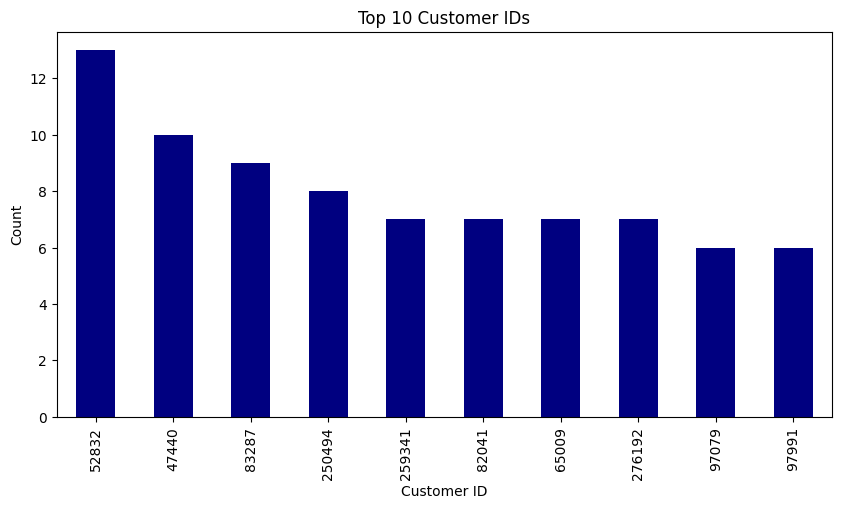

52832     13
47440     10
83287      9
250494     8
259341     7
82041      7
65009      7
276192     7
97079      6
97991      6
Name: customer_id, dtype: int64


In [ ]:
df['customer_id'].nunique()

top_ten_order_customers_per_orders = df["customer_id"].value_counts().head(10)
print(top_ten_order_customers_per_orders)

total_orders_created_by_top_ten_customers = top_ten_order_customers_per_orders.sum()
print(total_orders_created_by_top_ten_customers)

plt.figure(figsize=(10, 5))
df['customer_id'].value_counts().head(10).plot.bar(color=["navy"])
plt.xlabel('Customer ID')
plt.ylabel('Count')
plt.title('Top 10 Customer IDs')
plt.show()


top_ten_order_customers_per_orders = df["customer_id"].value_counts().head(10)
print(top_ten_order_customers_per_orders)

##### **Observations**
The sample data represents 1898 order.
There is no missing data from the customer_id column. Of the 1898 orders, 698 orders were placed by repeat customers. No repeat customer ordered more than 13 times. The top ten customers ordered 80 of the 698 repeat orders (11.46 % of the repeat orders).


---



## Restaurant Name

178
Shake Shack                      219
The Meatball Shop                132
Blue Ribbon Sushi                119
Blue Ribbon Fried Chicken         96
Parm                              68
RedFarm Broadway                  59
RedFarm Hudson                    55
TAO                               49
Han Dynasty                       46
Blue Ribbon Sushi Bar & Grill     44
Name: restaurant_name, dtype: int64
887


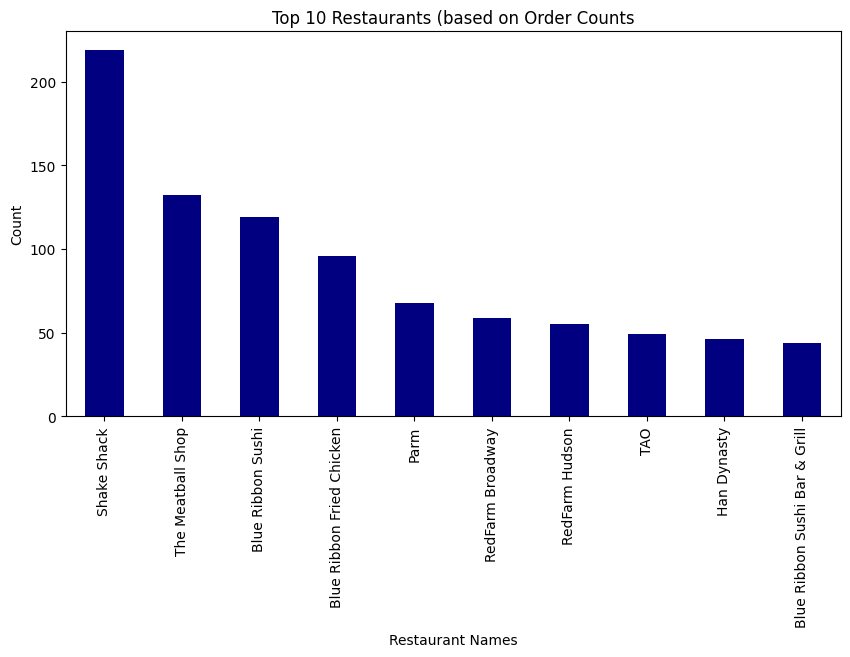

,order_id
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68
RedFarm Broadway,59
RedFarm Hudson,55
TAO,49
Han Dynasty,46


In [ ]:
restaurant_names=df['restaurant_name'].unique()
count_restaurant_names = len(restaurant_names)
print(count_restaurant_names)

top_ten_restaurants_per_order_totals = df["restaurant_name"].value_counts().head(10)
print(top_ten_restaurants_per_order_totals)

cumulative_top_ten_customer_orders = top_ten_restaurants_per_order_totals.sum()
print(cumulative_top_ten_customer_orders)

plt.figure(figsize=(10, 5))
df['restaurant_name'].value_counts().head(10).plot.bar(color=["navy"])
plt.xlabel('Restaurant Names')
plt.ylabel('Count')
plt.title('Top 10 Restaurants (based on Order Counts')
plt.show()

df[['restaurant_name','order_id']].groupby('restaurant_name').count().sort_values(by = 'order_id',axis = 0, ascending=False).head(10)


##### **Observations**
In the sample data, there are 178 unique restaurant names. Shake Shack topped the list with 219 orders (which constitutes 11.54% of the total orders in the sample).

The top ten restaurants with the most orders, had a combined total of 887 orders (which is 46.73% of the orders represented in the sample data)



---

## Cusine Type

14


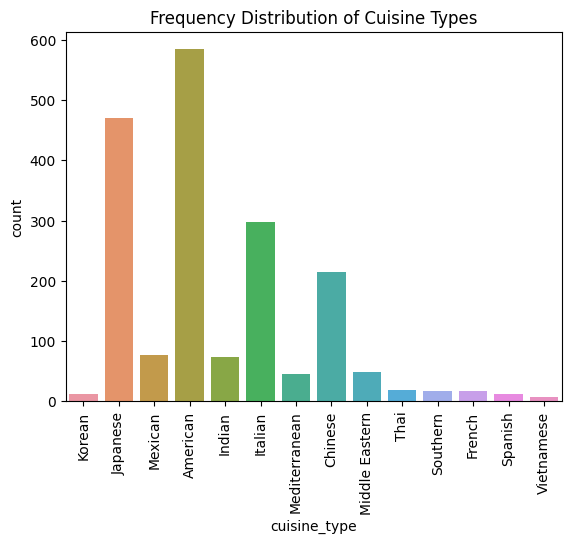

American          584
Japanese          470
Italian           298
Chinese           215
Mexican            77
Indian             73
Middle Eastern     49
Mediterranean      46
Thai               19
French             18
Southern           17
Korean             13
Spanish            12
Vietnamese          7
Name: cuisine_type, dtype: int64


In [ ]:
print(df['cuisine_type'].nunique())

sns.countplot(data=df,x='cuisine_type')
plt.title("Frequency Distribution of Cuisine Types")
plt.xticks(rotation= 90)
plt.show()

cuisine_type_counts = df["cuisine_type"].value_counts()
print(cuisine_type_counts)

##### Observations

There are 14 cusine types listed in the sample data.

The most popular cuisines as ranked:
- 1) American (584 orders)
- 2) Japanese (470 orders)
- 3) Italian (298 orders)
- 4) Chinese (215 orders)
- 5) Mexican (77 orders)

In the data sample Vietnamese is the least ordered, with only seven orders.

---




## Cost of Order


Minimum Cost of Order: 4.47
Maximum Cost of Order: 35.41
31314.82
                 restaurant_name  cost_of_the_order
0                    Shake Shack            3579.53
1              The Meatball Shop            2145.21
2              Blue Ribbon Sushi            1903.95
3      Blue Ribbon Fried Chicken            1662.29
4                           Parm            1112.76
5               RedFarm Broadway             965.13
6                 RedFarm Hudson             921.21
7                            TAO             834.50
8                    Han Dynasty             755.29
9  Blue Ribbon Sushi Bar & Grill             666.62
16.498851422550054 14.14 12.18


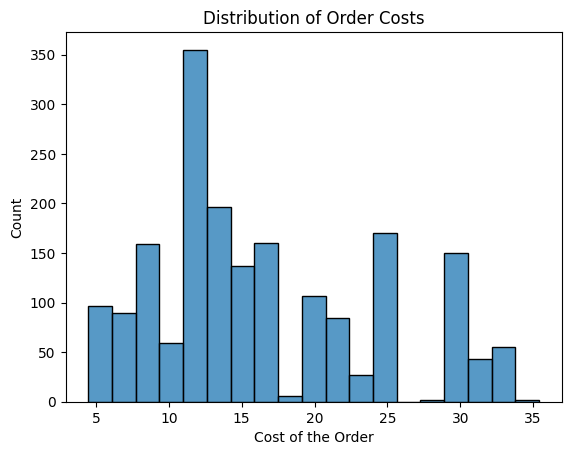

Cost of the order with the most frequency: 12.18


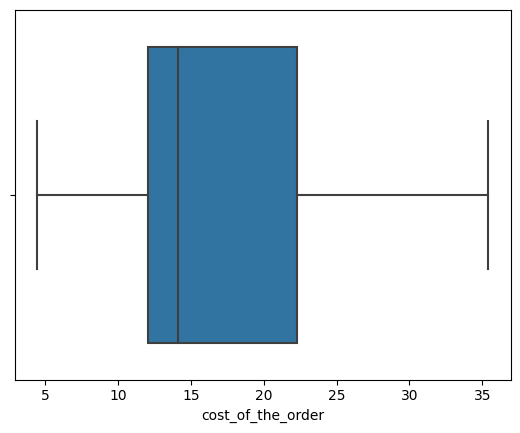

In [ ]:
min_cost = df["cost_of_the_order"].min()
max_cost = df["cost_of_the_order"].max()
print("Minimum Cost of Order:", min_cost)
print("Maximum Cost of Order:", max_cost)

total_cost_orders = df["cost_of_the_order"].sum()
print(total_cost_orders)

df_restaurant=df.groupby('restaurant_name')['cost_of_the_order'].sum().sort_values(ascending=False).reset_index()
print(df_restaurant.head(10))

#Calculate the cost of order with the most frequency
 #Calculate the frequency of each cost value
cost_freq = df["cost_of_the_order"].value_counts()
 #Get the cost value with the highest frequency
most_frequent_cost = cost_freq.idxmax()

mean=df['cost_of_the_order'].mean()
median=df['cost_of_the_order'].median()
mode=df['cost_of_the_order'].mode().values[0]
print(mean, median, mode)

sns.histplot(data=df,x='cost_of_the_order')
plt.xlabel("Cost of the Order")
plt.ylabel("Count")
plt.title("Distribution of Order Costs")


plt.show()
print("Cost of the order with the most frequency:", most_frequent_cost)

sns.boxplot(data=df,x='cost_of_the_order')
plt.show()



##### **Observations**

The sample data represents a total of 31,314.82 dollars
in orders. The least expensive order costs 4.47. The most expensive order costs 35.41.

Shake Shack is the top seller when evaluating revenue. This finding is consistent with the finding that Shake Shack received the most orders. The average Shake Shack order totaled aproximately 16.34 (219 orders).

The pattern holds for the other restaurants listed in the top ten most ordered from ranking (Restaurant Name Analysis). The restaurants listed occupied the same rank in both lists.

The Distribution of the Cost per Order is right skewed. The median cost is 14.14. The most frequent cost is 12.18. The average cost is 16.50. These numbers point to a positive-skew distribution.

---



## Days of the Week



['Weekend' 'Weekday']


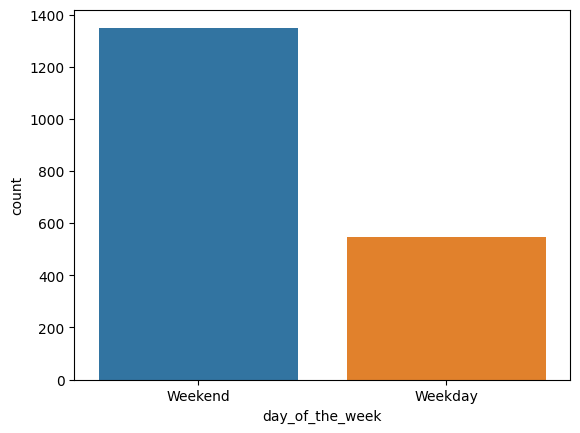

Weekend    1351
Weekday     547
Name: day_of_the_week, dtype: int64


In [ ]:
print(df['day_of_the_week'].unique() )
sns.countplot(x="day_of_the_week", data=df)
plt.show()
day_of_week_counts = df["day_of_the_week"].value_counts()
print(day_of_week_counts)

##### **Observations**

Weekend    1351
Weekday     547

Orders that occured during the weekend constituted 71.180%. Weekday order constituted only 28.82% of the orders placed. It is 2.469x more likely for an order to be placed on the weekend.



---




## Ratings Observations

0    736
5    588
4    386
3    188
Name: rating, dtype: int64


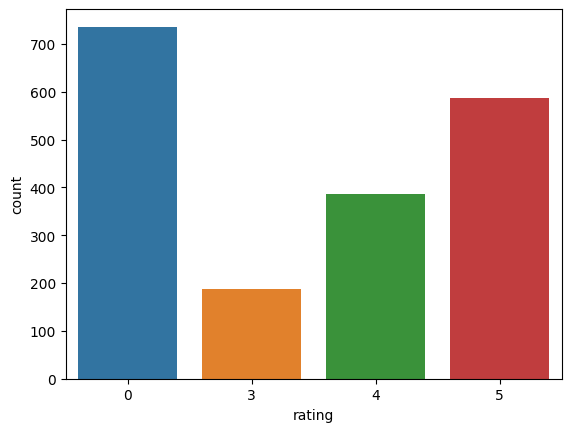

In [ ]:
df['rating'].unique()

rating_counts = df["rating"].value_counts()
print(rating_counts)

sns.countplot(data = df, x = 'rating')
plt.show();

##### **Observations**:

Only the ordinal ratings 0, 5, 3, 4 are noted within the sample data. Initially, the sample data presented "Not given" as an indicator that the customer did not provide an order ranking. In order to maintain data type consistency, during the data cleaning process, "Not given" was transformed into "0". Based on this decision, the majority of orders (736 ratings, constitues 38.78% of the ratings) were not rated.

The potential ratings "1" and "2" were not found within the sample data.

The data for the given ratings:

- Rating 0 [Not Given]:    736
- Rating 3:    188
- Rating 4:    386
- Rating 5:    588


## Food Preperation

21    135
23    123
27    123
22    123
28    121
24    121
20    119
30    119
33    118
35    117
31    116
26    115
25    113
34    113
32    113
29    109
Name: food_preparation_time, dtype: int64


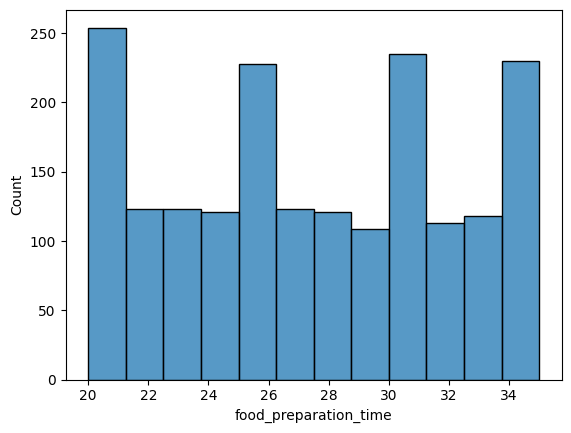

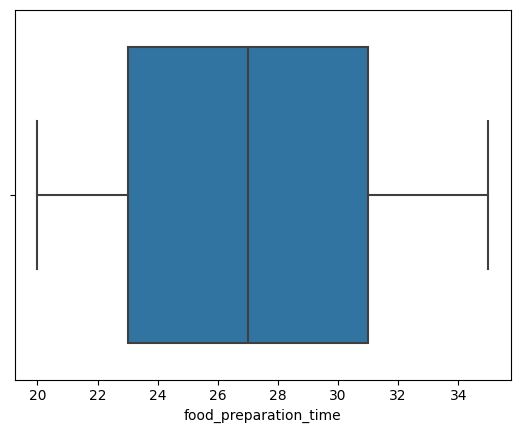

Minimum Food Preparation Time: 20
Maximum Food Preparation Time: 35


In [ ]:
food_preparation_time = df["food_preparation_time"].value_counts()
print(food_preparation_time)

sns.histplot(data=df,x='food_preparation_time')
plt.show()

sns.boxplot(data=df,x='food_preparation_time')
plt.show()

#MAX AND MIN
min_preparation_time = df["food_preparation_time"].min()
max_preparation_time = df["food_preparation_time"].max()
print("Minimum Food Preparation Time:", min_preparation_time)
print("Maximum Food Preparation Time:", max_preparation_time)

##### **Observations**:

The histogram representing the column "food_preparation_time" presents as mutimodal distribution.

The distribution is relatively even.

The multimodal presentation may be due to an underlying phenomena that is not reflected in the sample data.

**Minimum Food Preparation Time**: 20
**Maximum Food Preparation Time**: 35

The highest mode peak is 21. The highest peak constitutes about 7% of the collected sample data.

The median time for food preparation is ~27.


---



## Delivery Time

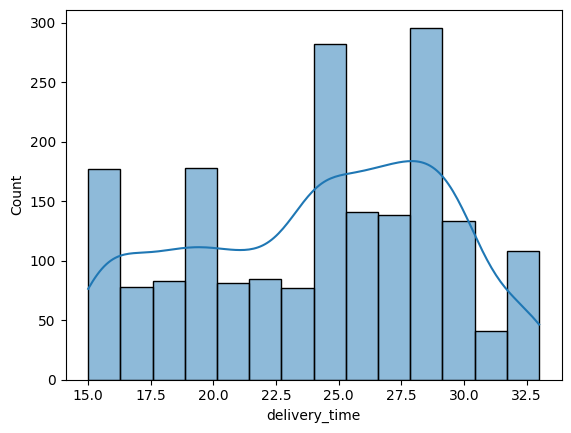

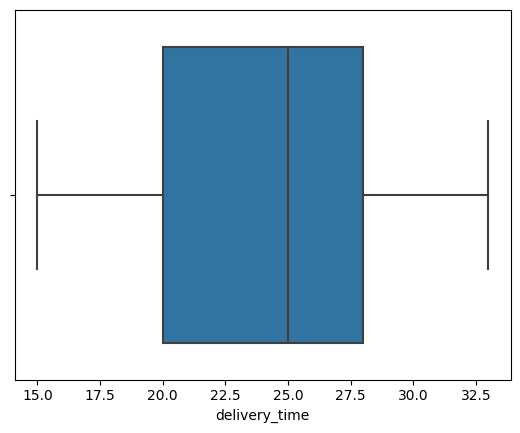

25.0

In [ ]:
#Histogram
sns.histplot(data = df, x ="delivery_time", kde=True)
plt.show()

#BoxPlot
sns.boxplot(x="delivery_time", data=df)
plt.show()

list_of_delivery_time = np.array(df["delivery_time"])

list_of_delivery_time = pd.Series(list_of_delivery_time)
list_of_delivery_time.median()

##### **Observations**
Although the histogram looks slightly skewed to the right. The presentation of the boxplot contradicts this position. The boxplot indicates that the median delivery time is ~25 minutes, with the the graph presenting slightly negative-skewed.

The highest peak is  ~28.25 minutes.
This implies a bigger spread below the median. This may be due to the most frequent (mode) delivery time noted is 24 minutes.

---



### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
df[['restaurant_name','order_id']].groupby('restaurant_name').count().sort_values(by = 'order_id',axis = 0, ascending=False).head(5)


,order_id
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68


##### **Observations**
- Shake Shack:	219
- The Meatball Shop:	132
- Blue Ribbon Sushi:	119
- Blue Ribbon Fried Chicken:	96
- Parm:	68


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
day_of_the_week = df[df['day_of_the_week'] =='Weekend']
cusiine_type_count = day_of_the_week.groupby('cuisine_type').count().sort_values(by = 'order_id',axis = 0, ascending=False).head(5)

##### **Observations**
American


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
cost_of_orders = df['cost_of_the_order'].count()

orders_20_plus = df['cost_of_the_order'][df['cost_of_the_order']> 20].count()

orders_cost_above_20 = round((orders_20_plus/cost_of_orders)*100,2)
orders_cost_above_20


29.24

##### **Observations**
29.24%



### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
mean_delivery_time = round(df[['delivery_time']].agg('mean'),2)

delivery_time    24.16
dtype: float64

##### **Observations**:

24.16 minutes for orders to be delivered


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
orders_per_customer = df[['order_id','customer_id']].groupby('customer_id').count().sort_values(by = 'order_id',axis = 0, ascending=False).head(5)
orders_per_customer

,order_id
customer_id,
52832,13
47440,10
83287,9
250494,8
65009,7


##### **Observations**:

The 3 most frequent customers:
- 1) Customer: 52832 w/ 13 orders
- 2) Customer: 47440 w/ 10 orders
- 3) Customer: 83287 w/ 9 orders



### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


<ipython-input-74-ac3c394ae79d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='seismic')


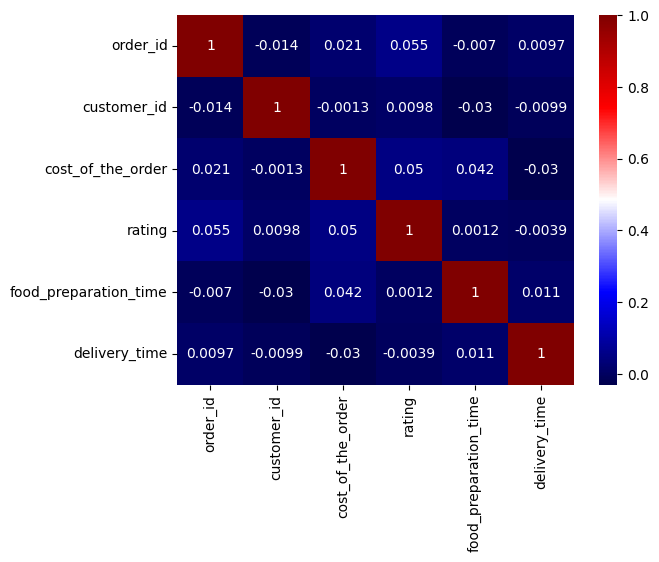

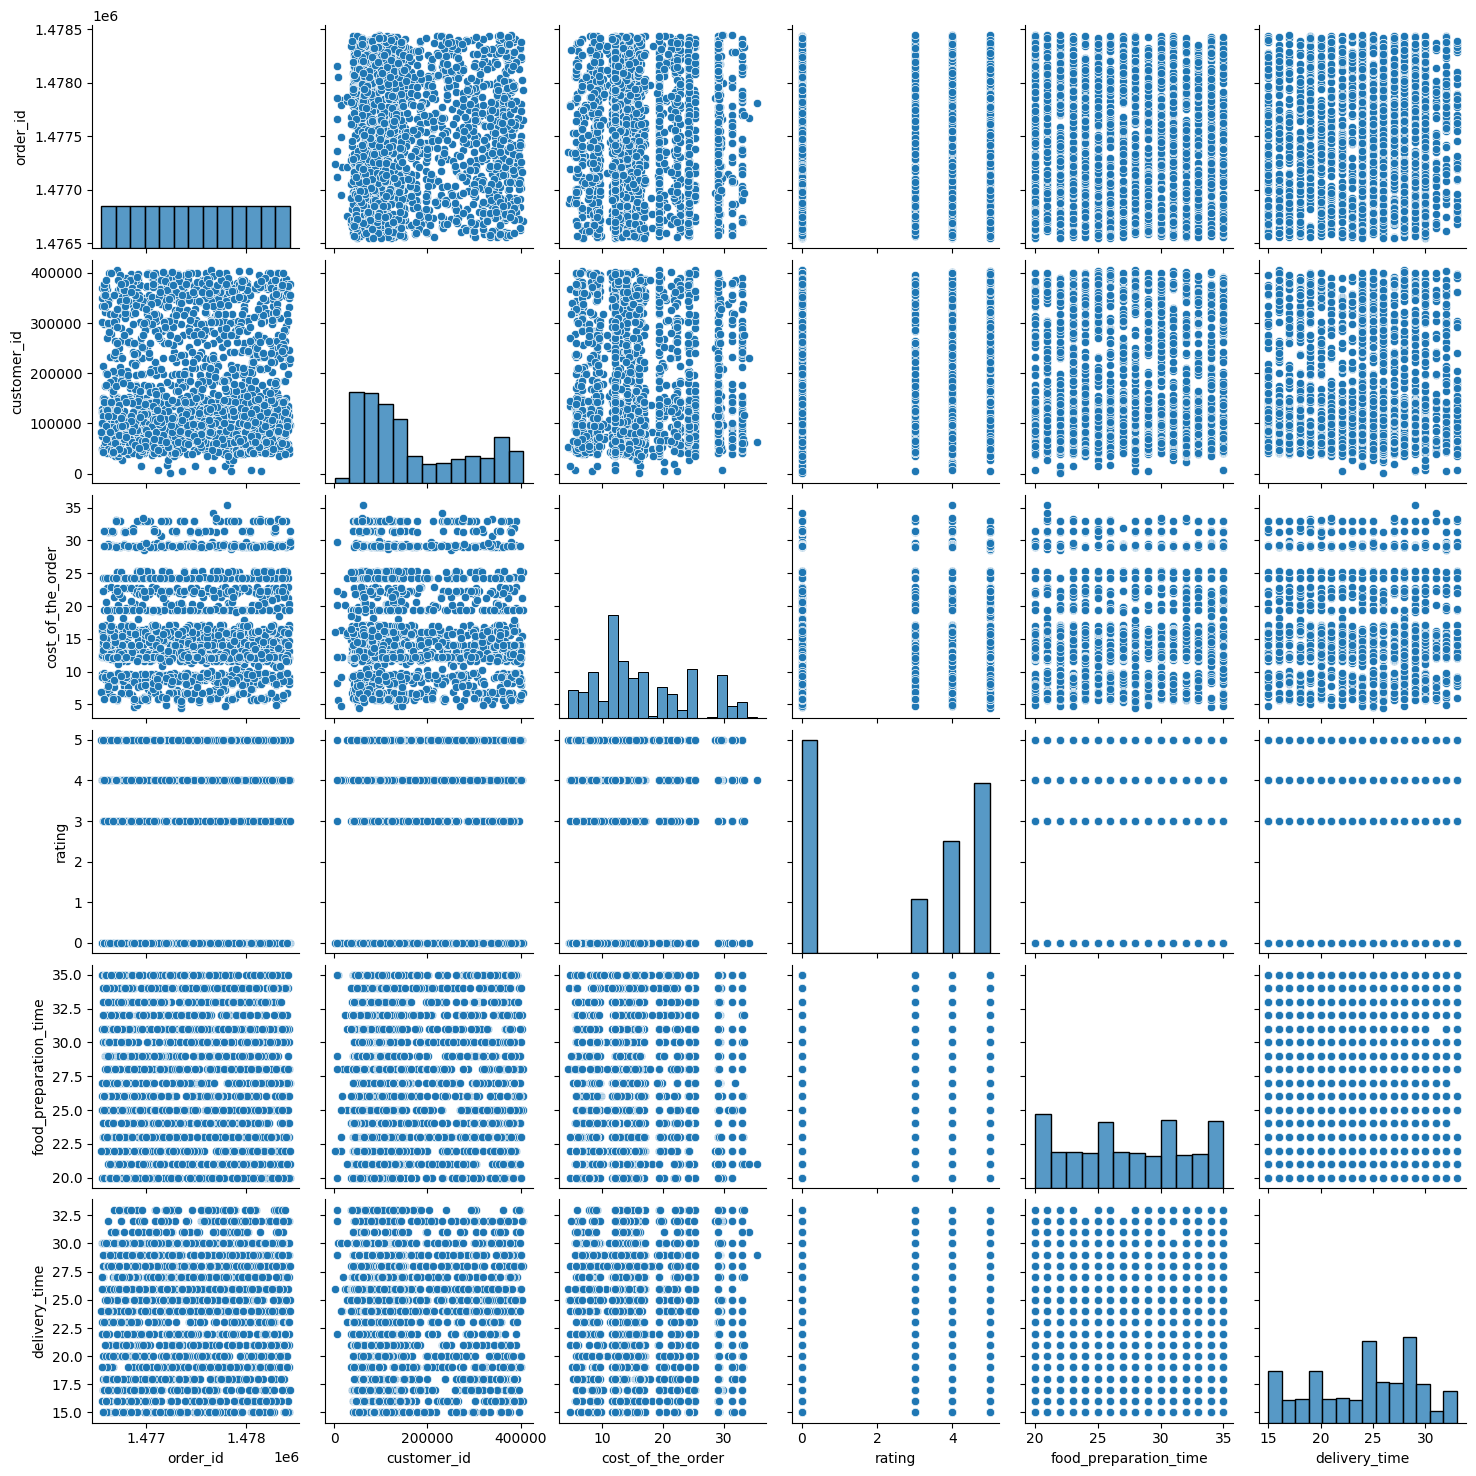

In [ ]:
sns.heatmap(df.corr(), annot=True, cmap='seismic')
plt.show()

sns.pairplot(data=df)
plt.show()

**Observation**: The heatmap and pairplot indicate that there is weak correlation between the categorical variables.

### **Question 13:**
The company wants to
provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
restaurants_ratings_greater_50 = df['restaurant_name'].value_counts() > 50
print(restaurants_ratings_greater_50)


Shake Shack                   True
The Meatball Shop             True
Blue Ribbon Sushi             True
Blue Ribbon Fried Chicken     True
Parm                          True
                             ...  
Sushi Choshi                 False
Dos Caminos Soho             False
La Follia                    False
Philippe Chow                False
'wichcraft                   False
Name: restaurant_name, Length: 178, dtype: bool


#### Observations:


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
revenue = 0

cost = pd.Series(df['cost_of_the_order'])

for i in range(len(cost)):
    if (cost[i] >= 5) & (cost[i] < 20):
        revenue += cost[i]*0.15
    elif (cost[i] >= 20):
        revenue += cost[i]*0.25
    else:
        revenue += 0

round(revenue, 2)


6166.3

<Axes: xlabel='cost_of_the_order', ylabel='Count'>

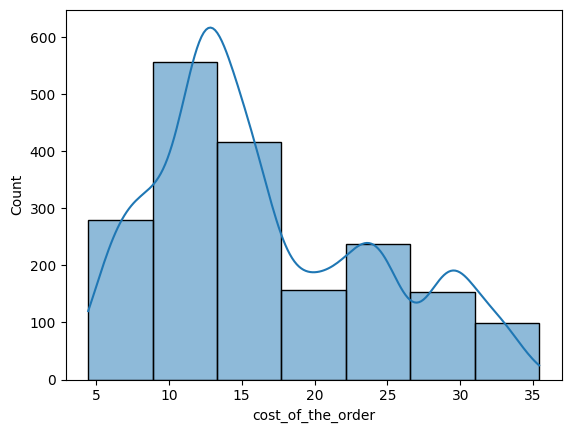

In [ ]:
sns.histplot(df["cost_of_the_order"], kde=True, bins=7)

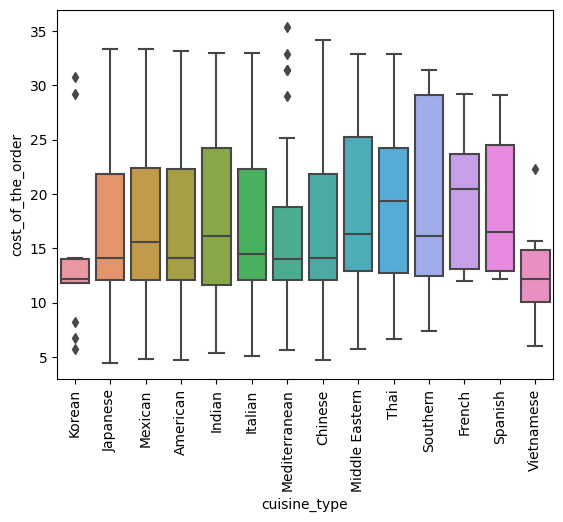

In [ ]:
sns.boxplot(x="cuisine_type", y="cost_of_the_order",data=df)
plt.xticks(rotation= 90)
plt.show()

##### **Observations**:

The net revenue on all orders is **6166.3**

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
df['total_prep_time'] = (df['food_preparation_time'])+ (df['delivery_time'])

total_prep_time_entries = df['total_prep_time'].count()
total_prep_time_entries_above60 = df['total_prep_time'][df['total_prep_time']> 60].count()

percentage = round((total_prep_time_entries_above60/total_prep_time_entries)*100,2)
percentage

10.54

##### Observations:

The percentage of orders that take more than 60 minutes from time of order is 10.54%


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

                delivery_time                       
                         mean    sum count       std
day_of_the_week                                     
Weekday             28.340037  15502   547  2.891428
Weekend             22.470022  30357  1351  4.628938


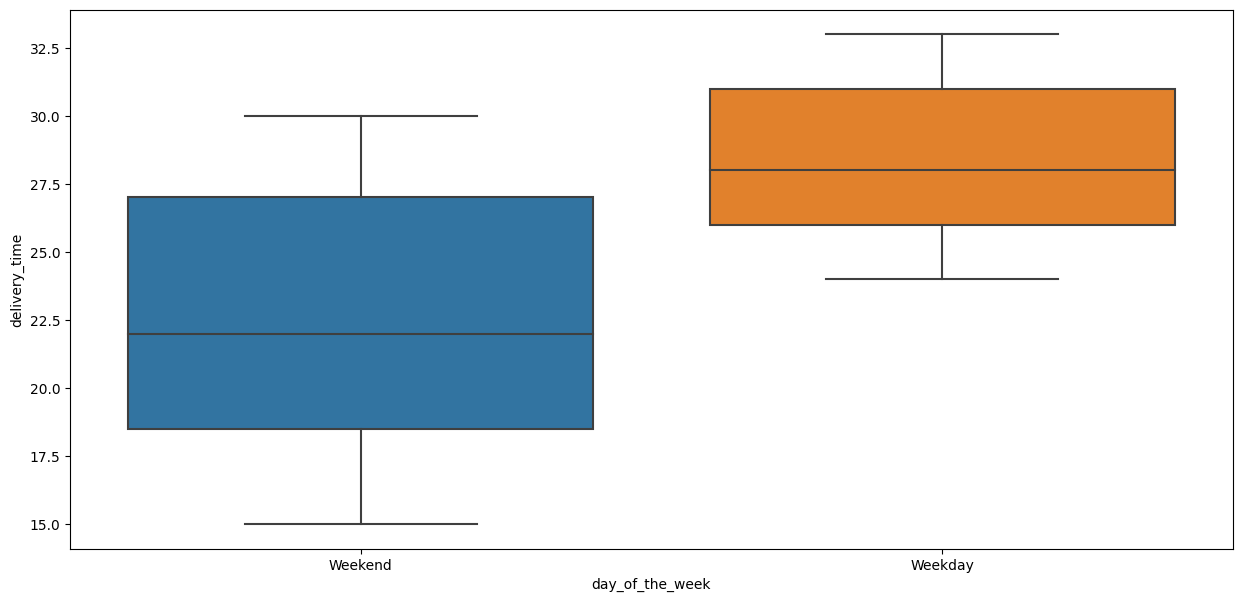

In [ ]:
print(df.groupby('day_of_the_week')[['delivery_time']].agg(['mean','sum','count','std']))

plt.figure(figsize=(15,7))
sns.boxplot(x="day_of_the_week", y="delivery_time",data=df)
plt.show()


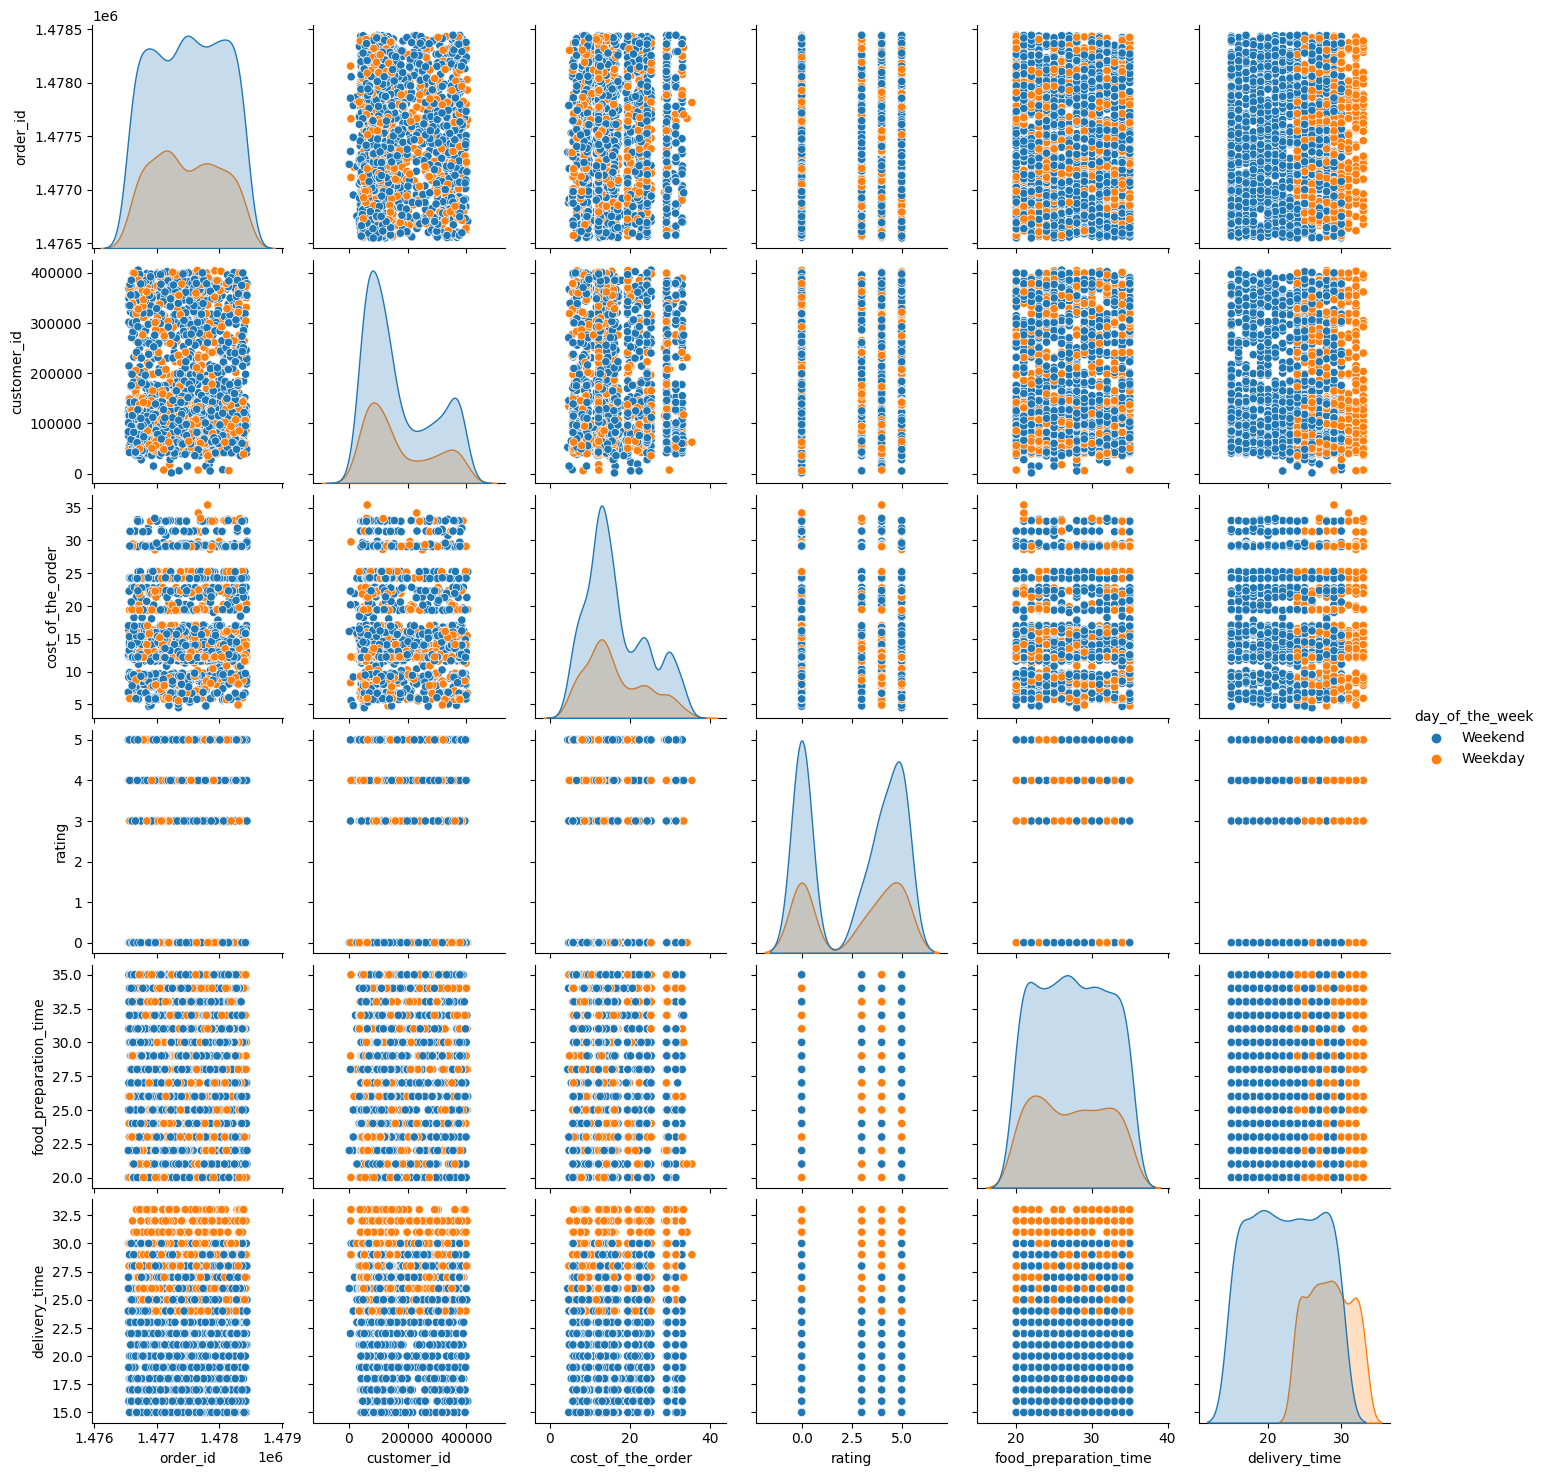

In [ ]:
sns.pairplot(data=df, hue="day_of_the_week", aspect=.95);

##### Observations:

The mean delivery time for the weekend is lower than the weekday. The average delivery time on the weekend is 22.47 minues, while the average weekend delivery time is 28.34 minutes. The average difference in speed is approx 6 minutes,

Weekend IQR is higher than during the weekend, which indicates a higher variability in delivery time.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  Foodhub receives more orders during the weekend, when compared to the weekday.
*  During the weekend, delivery times becomes more variable
*  American style cusine is the preferred style
*  The majority of ordersare not reviewed
*  Based on the calculated mean, most orders cost less than $20.00





### Recommendations:

*  **Reviews Incentives**: about 39% of orders did not have corresponding reviews. A lack of corresponding reviews may make it difficult for both customers and Foodhub to make informed decisions regarding restaurant selections in regards to ordering and promotion. It may be beneficial for Foodhub to find ways of incentiviing users to submit reviews.
*  **Reapeat Customers**: Of the 1898 orders within the sample data, only 698 customers placed more than one order. It could be beneficial to Foodhub to further investigate this finding, but sampling a larger percent of the population. If the pattern holds, it is recommended that Foodhub determine why nearly  2/3 of customers are not returning.
*  **Consumer Cuisine Selection**: A stricking pattern emerged when analyzing the orders by cusine_type. While American style cusine reached 584 orders, and three other styles broke the hundred plus order marker. There were 6 other cusine styles that did not reach 20 orders. It is recommended that Foodhub further investigate why this phenomenon might be occuring. Is it simply due to consumer preferencee, or due a bias in Foodhub's recommendation algorithim


  - Thai               19
  - French             18
  - Southern           17
  - Korean             13
  - Spanish            12
  - Vietnamese          7




---